In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
files = {}
files_numbers = [2,10,40,80,140,200,260,320]
iterations = [0,1,2,3,4]

In [42]:
# join every data frame in df
for num in files_numbers:
    for i in iterations:
        aux = pd.read_csv(f'../src/main/resources/output/velocity/diffNh/velocity_{num}_{i}.csv')
        #take only the last row
        aux = aux.tail(1)
        if num not in files:
            files[num] = aux.rename(columns={'Time':'Time','Zombies': f'FZ'})
        else:
            aux = aux.rename(columns={'Time':'Time','Zombies': f'FZ'})
            files[num] = files[num].append(aux)
    #calculate the mean of time
    files[num][f'mean'] = files[num]['Time'].mean()
    #calculate the standard deviation of time
    files[num][f'std'] = files[num]['Time'].std()
    files[num]['Nh'] = num
    #drop all columns except mean and std
    files[num] = files[num].drop(columns=['Time','FZ'])
    #take only the first row
    files[num] = files[num].head(1)
    
files

/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_60807/3071918145.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  files[num] = files[num].append(aux)
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_60807/3071918145.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  files[num] = files[num].append(aux)
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_60807/3071918145.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  files[num] = files[num].append(aux)
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_60807/3071918145.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  files[num] = files[n

{2:        mean        std  Nh
 654  105.98  42.884414   2,
 10:         mean       std  Nh
 1091  120.03  9.943676  10,
 40:        mean       std  Nh
 823  91.895  9.745246  40,
 80:       mean      std  Nh
 725  94.08  6.20973  80,
 140:        mean       std   Nh
 764  97.725  6.424732  140,
 200:         mean       std   Nh
 951  117.415  5.858717  200,
 260:          mean       std   Nh
 1009  125.885  9.586638  260,
 320:          mean       std   Nh
 1049  130.235  5.112564  320}

In [43]:
files[10]

,mean,std,Nh
1091,120.03,9.943676,10


In [44]:
df = pd.DataFrame(columns=['Nh','mean','std'])
for num in files_numbers:
    #append num, mean and std to df
    df = df.append(files[num])
df



/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_60807/1476435776.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(files[num])
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_60807/1476435776.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(files[num])
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_60807/1476435776.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(files[num])
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_60807/1476435776.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(files[num])
/var/folders/ld/9r7b_z79

,Nh,mean,std
654,2,105.980,42.884414
1091,10,120.030,9.943676
823,40,91.895,9.745246
725,80,94.080,6.209730
764,140,97.725,6.424732
951,200,117.415,5.858717
1009,260,125.885,9.586638
1049,320,130.235,5.112564


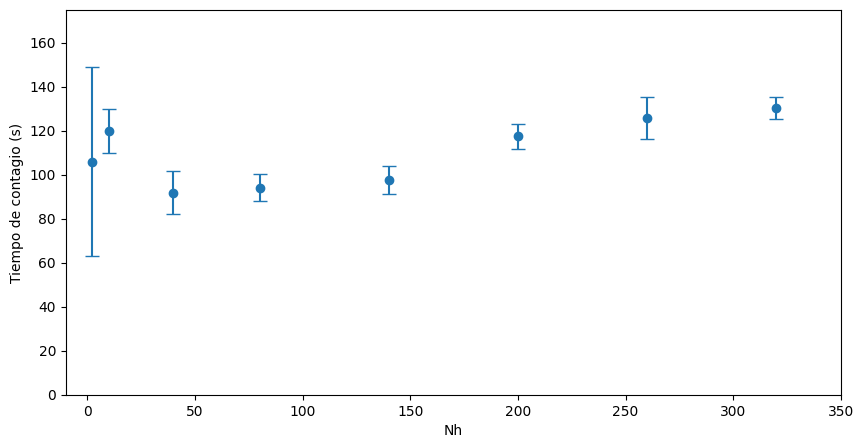

In [45]:
# graph of error bars

plt.figure(figsize=(10,5))
#error bar with only Nh values in x axis
plt.errorbar(df['Nh'], df['mean'], yerr=df['std'], fmt='o', capsize=5)
#with x= 0 in the intersection
plt.xlim(-10,350)
plt.ylim(0,175)
plt.xlabel('Nh')
plt.ylabel('Tiempo de contagio (s)')
#export plt to png in outputs folder from data_analysis
plt.savefig('./outputs/velocity_whole_infection.png')
plt.show()
